In [1]:
import pyam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
ar6_meta_path = '../../../data/SOD/model_results/raw/AR6_Scenarios_Database_metadata_indicators_v1.1.xlsx'
results_path = '../../../data/SOD/model_results/to_share/model_results_to_share_Outlooks.xlsx'
aim_path = '../../../data/SOD/model_results/raw/Consolidated_AIM_GEO7_240621.xlsx'
image_path = '../../../data/SOD/model_results/raw/Consolidated_IMAGE_GEO7_R3_results_12022025_0956.xlsx'

In [3]:
ar6_meta = pd.read_excel(ar6_meta_path, sheet_name='meta_Ch3vetted_withclimate')
ar6_c1_scenarios = ar6_meta[ar6_meta['Subset_Ch4'] == 'Limit to 1.5C (>50%) no or low OS immediate 2020 action']['Scenario'].unique()
# ar6_c1_scenarios = ar6_meta[ar6_meta['Category_subset'] == 'C1a_NZGHGs']['Scenario'].unique()
ar6_c78_scenarios = ar6_meta[ar6_meta['Subset_Ch4'] == 'Trend from implemented policies']['Scenario'].unique()

In [4]:
df_emissions_ar6 = pyam.read_iiasa(
    'ar6-public',
    variable=[
            'Primary Energy',
            'Primary Energy|Non-Biomass Renewables',
            'Primary Energy|Biomass',
            'Primary Energy|Biomass|Electricity|w/ CCS',
            'Primary Energy|Biomass|Modern|w/ CCS',
            'Primary Energy|Coal|w/ CCS',
            'Primary Energy|Gas|w/ CCS',
            'Primary Energy|Oil|w/ CCS',
            'Final Energy',
            'Final Energy|Electricity',
            'Emissions|CO2',
            # 'Emissions|CO2|*',
            'Emissions|CO2|Energy',
            'Emissions|CO2|AFOLU',
            'Emissions|Kyoto*',
            'Land Cover|Cropland', 
            'Land Cover|Pasture',
            'Land Cover|Forest',
            'Land Cover|Other Natural Land',
            # 'Land Cover|*',
            'Land Cover|Other Land',
            'Land Cover|Other Arable Land',
            'Carbon Sequestration|CCS',
            'Carbon Sequestration|CCS|Biomass',
            'Carbon Sequestration|CCS|Fossil', 
            ],
    region='World',
    scenario=list(ar6_c1_scenarios),
    
)

df_emissions_ar6 = df_emissions_ar6.filter(year=[2010,  2020,  2030,  2040,  2050])
df_emissions_ar6 = df_emissions_ar6.rename(variable={'Primary Energy|Biomass|Modern|w/ CCS':'Primary Energy|Biomass|w/ CCS',
                                                    #  'Land Cover|Other Land':'Land Cover|Other Natural Land'
                                                     })
df_emissions_ar6.aggregate('Land Cover|Other Natural Land', ['Land Cover|Other Land','Land Cover|Other Arable Land'], append=True)
df_emissions_ar6.variable

[INFO] 11:35:26 - ixmp4.conf.settings: Connecting as user 'stephenmaycock'.
[INFO] 11:35:26 - pyam.iiasa: You are connected to the IXSE_AR6_PUBLIC scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/ar6/#/about
[INFO] 11:35:26 - pyam.iiasa: You are connected as user `stephenmaycock`


['Carbon Sequestration|CCS',
 'Carbon Sequestration|CCS|Biomass',
 'Carbon Sequestration|CCS|Fossil',
 'Emissions|CO2',
 'Emissions|CO2|AFOLU',
 'Emissions|CO2|Energy',
 'Emissions|Kyoto Gases',
 'Final Energy',
 'Final Energy|Electricity',
 'Land Cover|Cropland',
 'Land Cover|Forest',
 'Land Cover|Other Arable Land',
 'Land Cover|Other Land',
 'Land Cover|Other Natural Land',
 'Land Cover|Pasture',
 'Primary Energy',
 'Primary Energy|Biomass',
 'Primary Energy|Biomass|Electricity|w/ CCS',
 'Primary Energy|Biomass|w/ CCS',
 'Primary Energy|Coal|w/ CCS',
 'Primary Energy|Gas|w/ CCS',
 'Primary Energy|Non-Biomass Renewables',
 'Primary Energy|Oil|w/ CCS']

In [5]:
df_emissions_geo = pd.read_excel(results_path)
df_emissions_geo.rename(columns={'topic':'model'}, inplace=True)
df_emissions_geo = pyam.IamDataFrame(df_emissions_geo)
df_emissions_geo = df_emissions_geo.filter(
    variable=[
            'Primary Energy',
            'Primary Energy|Non-Biomass Renewables',
            'Primary Energy|Biomass',
            'Primary Energy|*|w/ CCS',
            'Final Energy',
            'Final Energy|Electricity',
            'Emissions|CO2',
            'Emissions|CO2|Energy',
            'Emissions|CO2|AFOLU',
            'Emissions|Kyoto Gases',
            'Land Cover|Cropland', 
            'Land Cover|Pasture',
            'Land Cover|Forest',
            'Land Cover|Other Natural Land',
            'Carbon Sequestration|CCS',
            'Carbon Sequestration|CCS|Biomass',
            'Carbon Sequestration|CCS|Fossil',
            ],
    region='World',
)
df_emissions_geo = df_emissions_geo.filter(year=[2010, 2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050])

df_emissions_geo.variable

['Carbon Sequestration|CCS',
 'Carbon Sequestration|CCS|Biomass',
 'Carbon Sequestration|CCS|Fossil',
 'Emissions|CO2',
 'Emissions|CO2|AFOLU',
 'Emissions|CO2|Energy',
 'Emissions|Kyoto Gases',
 'Final Energy',
 'Final Energy|Electricity',
 'Primary Energy',
 'Primary Energy|Biomass',
 'Primary Energy|Biomass|w/ CCS',
 'Primary Energy|Coal|w/ CCS',
 'Primary Energy|Fossil|w/ CCS',
 'Primary Energy|Gas|w/ CCS',
 'Primary Energy|Non-Biomass Renewables',
 'Primary Energy|Oil|w/ CCS',
 'Land Cover|Cropland',
 'Land Cover|Pasture']

In [6]:
df_emissions_geo = df_emissions_geo.data
# Condition to identify rows to be removed
condition_image = (df_emissions_geo['model'] == 'IMAGE 3.3') & (df_emissions_geo['scenario'] == 'REF-v2')

# Remove multiple scenarios for aim
aim_scen_to_remove = ['TECH-TP-v2', 'LIFE-TP-v2']
condition_aim = (df_emissions_geo['model'] == 'AIM/Hub-Global 2.4') & (df_emissions_geo['scenario'].isin(aim_scen_to_remove))

# Remove rows based on the condition
df_emissions_geo = df_emissions_geo[~condition_image]
df_emissions_geo = df_emissions_geo[~condition_aim]

df_emissions_geo = df_emissions_geo.reset_index(drop=True)
df_emissions_geo

,model,scenario,region,variable,unit,year,value
0,Emissions,LIFE-TP,World,Carbon Sequestration|CCS,Mt CO2/yr,2010,0.0
1,Emissions,LIFE-TP,World,Carbon Sequestration|CCS,Mt CO2/yr,2020,0.0
2,Emissions,LIFE-TP,World,Carbon Sequestration|CCS,Mt CO2/yr,2030,1340.0
3,Emissions,LIFE-TP,World,Carbon Sequestration|CCS,Mt CO2/yr,2040,6310.0
4,Emissions,LIFE-TP,World,Carbon Sequestration|CCS,Mt CO2/yr,2050,9150.0
...,...,...,...,...,...,...,...
269,Land,TECH-TP,World,Land Cover|Pasture,million ha,2010,3160.0
270,Land,TECH-TP,World,Land Cover|Pasture,million ha,2020,3150.0
271,Land,TECH-TP,World,Land Cover|Pasture,million ha,2030,3020.0
272,Land,TECH-TP,World,Land Cover|Pasture,million ha,2040,2850.0


In [7]:
df_geo_data = df_emissions_geo
df_ar6_data = df_emissions_ar6.data
# variables = [
#              'Emissions|Kyoto Gases',
#              ]

variables = df_emissions_geo.variable.unique()

for variable in variables:
    print(variable)
    # Use Seaborn to create the plot with markers and lines
    geo_data = df_geo_data[df_geo_data["variable"] == variable]
    ar6_data = df_ar6_data[df_ar6_data["variable"] == variable]
    # # Define the color palette for scenarios
    scenario_colors = {
        "REF": "black",
        "LIFE-TP": "orange",
        "TECH-TP": "magenta",
        "REF-v2": "black",
        "LIFE-TP-v2": "orange",
        "TECH-TP-v2": "magenta",
    }

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
    sns.lineplot(
        data=geo_data,
        x="year",
        y="value",
        hue="scenario",
        palette=scenario_colors,
        linewidth=2.5,
        ax=ax
    )
    sns.lineplot(
        data=ar6_data,
        x="year",
        y="value",
        linewidth=0,
        ax=ax,
        # errorbar='sd',
        errorbar=(lambda x: (x.min(), x.max())),
        color='grey'
    )
    ax.legend().set_visible(False)
    # Set labels and title
    plt.xlabel("Year", fontsize=12)
    plt.ylabel(geo_data["unit"].iloc[0], fontsize=12)  # Set the y-axis label to the unit
    ax.set_ylim(min(0,ax.get_ylim()[0]), ax.get_ylim()[1])
    plt.title(variable)  # Set the title to the variable
    plt.xticks([2010, 2020, 2030, 2040, 2050], 
               rotation=45,
               fontsize=12)
    plt.yticks(fontsize=12)

    # Manually add Legend
    handles, labels = ax.get_legend_handles_labels()
    legend_patch = mpatches.Patch(color='grey', alpha=0.3)
    handles = handles + [legend_patch]
    labels = labels + ['C1 IPCC Scenarios']
    fig.legend(handles, labels, title="Legend", bbox_to_anchor=(1.2, 0.9)) 
    plt.grid(True)
    # Adjust layout to ensure legend fits within the saved image
    plt.tight_layout()
    root_variable = variable.split("|")[0].replace(" ", "_")
    variable_name = variable.replace("|", "_").replace(" ", "_").replace("/", "")
    # plt.savefig(f"./plots/chapter_11/{variable_name}.png", bbox_inches="tight")
    plt.savefig(f"../../../plots/SOD/chpt_12/diagnostic/{variable_name}.png", bbox_inches="tight")
    plt.close()

Carbon Sequestration|CCS
Carbon Sequestration|CCS|Biomass
Carbon Sequestration|CCS|Fossil
Emissions|CO2
Emissions|CO2|AFOLU
Emissions|CO2|Energy
Emissions|Kyoto Gases
Final Energy
Final Energy|Electricity
Primary Energy
Primary Energy|Biomass
Primary Energy|Biomass|w/ CCS
Primary Energy|Coal|w/ CCS
Primary Energy|Fossil|w/ CCS
Primary Energy|Gas|w/ CCS
Primary Energy|Non-Biomass Renewables
Primary Energy|Oil|w/ CCS
Land Cover|Cropland
Land Cover|Pasture


# GHG Sinks and Sources

In [8]:
df_emissions_sinks_aim = pyam.IamDataFrame(aim_path)
df_emissions_sinks_aim = df_emissions_sinks_aim.filter(variable=[
        'Emissions|CO2|Energy',
        'Emissions|CO2|Energy|Demand|Residential',
        'Emissions|CO2|Energy|Demand|Industry',
        'Emissions|CO2|Industrial Processes',
        'Emissions|CO2|Energy|Demand|Transportation',
        'Emissions|CO2|Energy and Industrial Processes',
        'Carbon Sequestration|CCS|Biomass',
        'Carbon Sequestration|Direct Air Capture',
        'Emissions|CO2|AFOLU',
        'Emissions|CO2|Energy',
        'Emissions|Kyoto Gases',
        'Emissions|CO2'],
        region='World',
        scenario=['REF-v2'],)

df_emissions_sinks_aim.subtract('Emissions|CO2|Energy and Industrial Processes','Emissions|CO2|Energy', 'Emissions|CO2|Industrial Processes', ignore_units='Mt CO2/yr', append=True)
df_emissions_sinks_aim.variable

[INFO] 11:35:51 - pyam.core: Reading file ..\..\..\data\SOD\model_results\raw\Consolidated_AIM_GEO7_240621.xlsx


['Emissions|CO2',
 'Emissions|CO2|AFOLU',
 'Emissions|CO2|Energy',
 'Emissions|CO2|Energy and Industrial Processes',
 'Emissions|CO2|Energy|Demand|Industry',
 'Emissions|CO2|Energy|Demand|Residential',
 'Emissions|CO2|Energy|Demand|Transportation',
 'Emissions|CO2|Industrial Processes',
 'Emissions|Kyoto Gases']

In [9]:
df_emissions_sinks_image = pyam.IamDataFrame(image_path)
df_emissions_sinks_image = df_emissions_sinks_image.filter(variable=[
    'Emissions|CO2|Energy|Demand|Residential',
    'Emissions|CO2|Energy|Demand|Industry',
    'Emissions|CO2|Industrial Processes',
    'Emissions|CO2|Energy|Demand|Transportation',
    'Emissions|CO2|Energy and Industrial Processes',
    'Carbon Sequestration|CCS|Biomass',
    'Carbon Sequestration|Direct Air Capture',
    'Emissions|CO2|AFOLU',
    'Emissions|CO2|Energy',
    'Emissions|Kyoto Gases',
    'Emissions|CO2',
    ],
    region='World',
    scenario=['LIFE-TP-v2', 'TECH-TP-v2']
)
df_emissions_sinks_image.variable

[INFO] 11:36:01 - pyam.core: Reading file ..\..\..\data\SOD\model_results\raw\Consolidated_IMAGE_GEO7_R3_results_12022025_0956.xlsx


['Carbon Sequestration|CCS|Biomass',
 'Carbon Sequestration|Direct Air Capture',
 'Emissions|CO2',
 'Emissions|CO2|AFOLU',
 'Emissions|CO2|Energy',
 'Emissions|CO2|Energy and Industrial Processes',
 'Emissions|CO2|Energy|Demand|Industry',
 'Emissions|CO2|Energy|Demand|Residential',
 'Emissions|CO2|Energy|Demand|Transportation',
 'Emissions|CO2|Industrial Processes',
 'Emissions|Kyoto Gases']

In [10]:
df_carbon_seq_aim = df_emissions_sinks_image.filter(variable='Carbon Sequestration|Direct Air Capture',scenario='LIFE-TP-v2')
df_carbon_seq_aim.rename(model={'IMAGE 3.3':'AIM/Hub-Global 2.4'}, scenario={'LIFE-TP-v2':'REF-v2'}, inplace=True)
df_carbon_seq_aim.multiply('Carbon Sequestration|Direct Air Capture', 0, 'Carbon Sequestration|CCS|Biomass', ignore_units='Mt CO2/yr', append=True)
df_carbon_seq_aim.timeseries()

2005  \
model              scenario region variable                                unit              
AIM/Hub-Global 2.4 REF-v2   World  Carbon Sequestration|CCS|Biomass        Mt CO2/yr   0.0   
                                   Carbon Sequestration|Direct Air Capture Mt CO2/yr   0.0   

                                                                                      2010  \
model              scenario region variable                                unit              
AIM/Hub-Global 2.4 REF-v2   World  Carbon Sequestration|CCS|Biomass        Mt CO2/yr   0.0   
                                   Carbon Sequestration|Direct Air Capture Mt CO2/yr   0.0   

                                                                                      2015  \
model              scenario region variable                                unit              
AIM/Hub-Global 2.4 REF-v2   World  Carbon Sequestration|CCS|Biomass        Mt CO2/yr   0.0   
                                   Carbon Sequestration|Direct Air Capture Mt CO2/yr   0.0   

                                                                                      2020  \
model              scenario region variable                                unit              
AIM/Hub-Global 2.4 REF-v2   World  Carbon Sequestration|CCS|Biomass        Mt CO2/yr   0.0   
                                   Carbon Sequestration|Direct Air Capture Mt CO2/yr   0.0   

                                                                                      2025  \
model              scenario region variable                                unit              
AIM/Hub-Global 2.4 REF-v2   World  Carbon Sequestration|CCS|Biomass        Mt CO2/yr   0.0   
                                   Carbon Sequestration|Direct Air Capture Mt CO2/yr   0.0   

                                                                                      2030  \
model              scenario region variable                                unit              
AIM/Hub-Global 2.4 REF-v2   World  Carbon Sequestration|CCS|Biomass        Mt CO2/yr   0.0   
                                   Carbon Sequestration|Direct Air Capture Mt CO2/yr   0.0   

                                                                                      2035  \
model              scenario region variable                                unit              
AIM/Hub-Global 2.4 REF-v2   World  Carbon Sequestration|CCS|Biomass        Mt CO2/yr   0.0   
                                   Carbon Sequestration|Direct Air Capture Mt CO2/yr   0.0   

                                                                                      2040  \
model              scenario region variable                                unit              
AIM/Hub-Global 2.4 REF-v2   World  Carbon Sequestration|CCS|Biomass        Mt CO2/yr   0.0   
                                   Carbon Sequestration|Direct Air Capture Mt CO2/yr   0.0   

                                                                                      2045  \
model              scenario region variable                                unit              
AIM/Hub-Global 2.4 REF-v2   World  Carbon Sequestration|CCS|Biomass        Mt CO2/yr   0.0   
                                   Carbon Sequestration|Direct Air Capture Mt CO2/yr   0.0   

                                                                                      2050  \
model              scenario region variable                                unit              
AIM/Hub-Global 2.4 REF-v2   World  Carbon Sequestration|CCS|Biomass        Mt CO2/yr   0.0   
                                   Carbon Sequestration|Direct Air Capture Mt CO2/yr   0.0   

                                                                                      2060  \
model              scenario region variable                                unit              
AIM/Hub-Global 2.4 REF-v2   World  Carbon Sequestration|CCS|Biomass        Mt CO2/yr   0.0   
                                  

In [11]:
df_emissions_geo_sinks = pyam.concat([df_emissions_sinks_aim, df_emissions_sinks_image, df_carbon_seq_aim])
df_emissions_geo_sinks.interpolate([2046, 2047, 2048, 2049]).filter(year=[2046, 2047, 2048, 2049]).timeseries()

2046  \
model              scenario   region variable                                      unit                            
AIM/Hub-Global 2.4 REF-v2     World  Carbon Sequestration|CCS|Biomass              Mt CO2/yr            0.000000   
                                     Carbon Sequestration|Direct Air Capture       Mt CO2/yr            0.000000   
                                     Emissions|CO2                                 Mt CO2/yr        58152.512740   
                                     Emissions|CO2|AFOLU                           Mt CO2/yr         2563.296960   
                                     Emissions|CO2|Energy                          Mt CO2/yr        52088.974560   
                                     Emissions|CO2|Energy and Industrial Processes Mt CO2/yr        55539.525360   
                                     Emissions|CO2|Energy|Demand|Industry          Mt CO2/yr        11518.181880   
                                     Emissions|CO2|Energy|Demand|Residential       Mt CO2/yr         2234.947200   
                                     Emissions|CO2|Energy|Demand|Transportation    Mt CO2/yr        14868.830600   
                                     Emissions|CO2|Industrial Processes            Mt CO2/yr         3450.550800   
                                     Emissions|Kyoto Gases                         Mt CO2-equiv/yr  79160.021520   
IMAGE 3.3          LIFE-TP-v2 World  Carbon Sequestration|CCS|Biomass              Mt CO2/yr         3072.626282   
                                     Carbon Sequestration|Direct Air Capture       Mt CO2/yr            0.000000   
                                     Emissions|CO2                                 Mt CO2/yr        -1114.455583   
                                     Emissions|CO2|AFOLU                           Mt CO2/yr        -3420.399890   
                                     Emissions|CO2|Energy                          Mt CO2/yr         1612.621763   
                                     Emissions|CO2|Energy and Industrial Processes Mt CO2/yr         2305.944250   
                                     Emissions|CO2|Energy|Demand|Industry          Mt CO2/yr          353.615443   
                                     Emissions|CO2|Energy|Demand|Residential       Mt CO2/yr          332.052945   
                                     Emissions|CO2|Energy|Demand|Transportation    Mt CO2/yr         1652.706659   
                                     Emissions|CO2|Industrial Processes            Mt CO2/yr          693.322053   
                                     Emissions|Kyoto Gases                         Mt CO2-equiv/yr   4691.096533   
                   TECH-TP-v2 World  Carbon Sequestration|CCS|Biomass              Mt CO2/yr         4095.435037   
                                     Carbon Sequestration|Direct Air Capture       Mt CO2/yr            0.000000   
                                     Emissions|CO2                                 Mt CO2/yr          446.374593   
                                     Emissions|CO2|AFOLU                           Mt CO2/yr        -3555.147811   
                                     Emissions|CO2|Energy                          Mt CO2/yr         3165.288572   
                                     Emissions|CO2|Energy and Industrial Processes Mt CO2/yr         4001.522583   
                                     Emissions|CO2|Energy|Demand|Industry          Mt CO2/yr          414.193369   
                                     Emissions|CO2|Energy|Demand|Residential       Mt CO2/yr           84.247555   
                                     Emissions|CO2|Energy|Demand|Transportation    Mt CO2/yr         2841.022074   
                                     Emissions|CO2|Industrial Processes            Mt CO2/yr          836.232527   
                                     Emissions|Kyoto Gases                         Mt CO2-equiv/yr   7643.707031   

                                               

In [12]:
# # GHG sinks
# o	Buildings: Emissions|CO2|Energy|Demand|Residential and Commercial
# o	Industry: Emissions|CO2|Energy|Demand|Industrial Processes + Emissions|CO2|Industrial Processes
# o	Transport: Emissions|CO2|Energy|Demand|Transportation
# o	Energy Supply (pos.): 
# Emissions|CO2|Energy and Industrial Processes - (Emissions|CO2|Energy|Demand|Residential and Commercial + Emissions|CO2|Energy|Demand|Industrial Processes + Emissions|CO2|Industrial Processes + Emissions|CO2|Energy|Demand|Transportation)
# - (Carbon Sequestration|CCS|Biomass + Carbon Sequestration|Direct Air Capture)
# o	Energy Supply (neg.):  Negative of (Carbon Sequestration|CCS|Biomass plus Carbon Sequestration|Direct Air Capture)
# o	AFOLU: Emissions|CO2|AFOLU
# o	Non-CO2: AR6 climate diagnostics|Native-with-Infilled|Emissions|Kyoto Gases AR6-GWP100) - Emissions|CO2


df_emissions_geo_sinks.rename({'scenario':{'REF-v2': 'Current Trends',
                                           'LIFE-TP-v2':"Behaviour-focused", 
                                           'TECH-TP-v2':"Technology-focused"}}, inplace=True)
df_emissions_geo_sinks.aggregate("Buildings", 
                       components=['Emissions|CO2|Energy|Demand|Residential'], 
                    #    ignore_units='Mt CO2/yr',
                        append=True)

df_emissions_geo_sinks.aggregate("Industry", 
                       components=['Emissions|CO2|Energy|Demand|Industry',
                                    'Emissions|CO2|Industrial Processes',],
                        # ignore_units='Mt CO2/yr', 
                        append=True)

df_emissions_geo_sinks.aggregate("Transport", 
                       components=['Emissions|CO2|Energy|Demand|Transportation'],
                    #    ignore_units='Mt CO2/yr', 
                        append=True)

df_emissions_geo_sinks.aggregate("Energy Supply (neg.) temp", 
                       components=['Carbon Sequestration|CCS|Biomass',
                                    'Carbon Sequestration|Direct Air Capture',],
                        # ignore_units='Mt CO2/yr', 
                        append=True)
df_emissions_geo_sinks.multiply('Energy Supply (neg.) temp', -1, 'Energy Supply (neg.)', ignore_units='Mt CO2/yr',
                                append=True)

# Energy Supply (pos.)
df_emissions_geo_sinks.aggregate("Building, Industry & Transport", 
                       components=['Buildings',
                                    'Industry',
                                    'Transport'],
                        # ignore_units='Mt CO2/yr', 
                        append=True)

df_emissions_geo_sinks.subtract('Emissions|CO2|Energy and Industrial Processes', 
                                ["Building, Industry & Transport", 'Energy Supply (neg.)'], 
                                'Energy Supply (pos.)', 
                                ignore_units='Mt CO2/yr',
                                append=True
                                )


df_emissions_geo_sinks.aggregate("Land Use", 
                       components=['Emissions|CO2|AFOLU'],
                    #    ignore_units='Mt CO2/yr', 
                        append=True)

df_emissions_geo_sinks.subtract('Emissions|Kyoto Gases', 'Emissions|CO2', 'Non-CO2', ignore_units='Mt CO2/yr',
                                append=True)

final_var_list = [
    'Buildings',
    'Industry',
    'Transport',
    'Energy Supply (neg.)',
    'Energy Supply (pos.)',
    'Land Use',
    'Non-CO2',
]

df_emissions_geo_sinks = df_emissions_geo_sinks.filter(variable=final_var_list)


df_emissions_geo_sinks.convert_unit('Mt CO2/yr', 'Gt CO2/yr', inplace=True)
df_emissions_geo_sinks.timeseries()

2005  \
model              scenario           region variable             unit                   
AIM/Hub-Global 2.4 Current Trends     World  Buildings            Gt CO2/yr        NaN   
                                             Energy Supply (neg.) Gt CO2/yr  -0.000000   
                                             Energy Supply (pos.) Gt CO2/yr        NaN   
                                             Industry             Gt CO2/yr        NaN   
                                             Land Use             Gt CO2/yr        NaN   
                                             Non-CO2              Gt CO2/yr        NaN   
                                             Transport            Gt CO2/yr        NaN   
IMAGE 3.3          Behaviour-focused  World  Buildings            Gt CO2/yr   1.762227   
                                             Energy Supply (neg.) Gt CO2/yr  -0.000000   
                                             Energy Supply (pos.) Gt CO2/yr  15.714913   
                                             Industry             Gt CO2/yr   5.602850   
                                             Land Use             Gt CO2/yr   4.573768   
                                             Non-CO2              Gt CO2/yr  12.007237   
                                             Transport            Gt CO2/yr   5.298491   
                   Technology-focused World  Buildings            Gt CO2/yr   1.762227   
                                             Energy Supply (neg.) Gt CO2/yr  -0.000000   
                                             Energy Supply (pos.) Gt CO2/yr  15.714913   
                                             Industry             Gt CO2/yr   5.602850   
                                             Land Use             Gt CO2/yr   4.573768   
                                             Non-CO2              Gt CO2/yr  12.007237   
                                             Transport            Gt CO2/yr   5.298491   

                                                                                  2010  \
model              scenario           region variable             unit                   
AIM/Hub-Global 2.4 Current Trends     World  Buildings            Gt CO2/yr   1.896557   
                                             Energy Supply (neg.) Gt CO2/yr  -0.000000   
                                             Energy Supply (pos.) Gt CO2/yr  14.997415   
                                             Industry             Gt CO2/yr   8.925889   
                                             Land Use             Gt CO2/yr   5.750792   
                                             Non-CO2              Gt CO2/yr  12.404228   
                                             Transport            Gt CO2/yr   7.150509   
IMAGE 3.3          Behaviour-focused  World  Buildings            Gt CO2/yr   1.853317   
                                             Energy Supply (neg.) Gt CO2/yr  -0.000000   
                                             Energy Supply (pos.) Gt CO2/yr  18.211371   
                                             Industry             Gt CO2/yr   6.909749   
                                             Land Use             Gt CO2/yr   5.226955   
                                             Non-CO2              Gt CO2/yr  12.958966   
                                             Transport            Gt CO2/yr   5.663742   
                   Technology-focused World  Buildings            Gt CO2/yr   1.853317   
                                             Energy Supply (neg.) Gt CO2/yr  -0.000000   
                                             Energy Supply (pos.) Gt CO2/yr  18.211438   
                                             Industry             Gt CO2/yr   6.909749   
                                             Land Use             Gt CO2/yr   5.226955   
                                             Non-CO2              Gt CO2/yr  12.959034   
                               

In [13]:
def fill_series(x, time):
    """Returns the timeseries value at a point in time by linear interpolation

    Parameters
    ----------
    x : pandas.Series
        a timeseries to be interpolated
    time : int or pandas.datetime
        year or datetime to interpolate
    """
    x = x.dropna()
    if time in x.index and not np.isnan(x[time]):
        return x[time]
    else:
        prev = [i for i in x.columns if i < time]
        nxt = [i for i in x.columns if i > time]
        if prev and nxt:
            p = max(prev)
            n = min(nxt)
            return ((n - time) * x[p] + (time - p) * x[n]) / (n - p)
        else:
            return np.nan
        
# Calculate the netzero values
# Netzero time manually checked
# Create dummy year to add both netzero years in same dataframe
life_df = df_emissions_geo_sinks.filter(scenario="Behaviour-focused").timeseries()
life_netzero_year = 2048
netzero_life_df = pd.DataFrame()
netzero_life_df[9999] = fill_series(life_df, life_netzero_year)

tech_df = df_emissions_geo_sinks.filter(scenario="Technology-focused").timeseries()
tech_netzero_year = 2049
netzero_tech_df = pd.DataFrame()
netzero_tech_df[9999] = fill_series(tech_df, tech_netzero_year)
netzero_tech_df

9999
model     scenario           region variable             unit               
IMAGE 3.3 Technology-focused World  Buildings            Gt CO2/yr  0.023928
                                    Energy Supply (neg.) Gt CO2/yr -4.397272
                                    Energy Supply (pos.) Gt CO2/yr  3.542139
                                    Industry             Gt CO2/yr  1.040579
                                    Land Use             Gt CO2/yr -4.038445
                                    Non-CO2              Gt CO2/yr  7.016757
                                    Transport            Gt CO2/yr  2.175841

In [14]:
print('life',netzero_life_df.sum() - netzero_life_df.iloc[-2])
print('tech',netzero_tech_df.sum() - netzero_tech_df.iloc[-2])

life 9999   -2.254497
dtype: float64
tech 9999   -1.65323
dtype: float64


In [15]:
pyam_netzero = pyam.concat([netzero_life_df, netzero_tech_df]).filter(year=[9999])
df_emissions_geo_sinks_2020 = df_emissions_geo_sinks.filter(scenario='Current Trends', year=[2020, 2050])
pyam_netzero.timeseries()

9999
model     scenario           region variable             unit               
IMAGE 3.3 Behaviour-focused  World  Buildings            Gt CO2/yr  0.273920
                                    Energy Supply (neg.) Gt CO2/yr -3.074025
                                    Energy Supply (pos.) Gt CO2/yr  2.214123
                                    Industry             Gt CO2/yr  0.792604
                                    Land Use             Gt CO2/yr -3.766544
                                    Non-CO2              Gt CO2/yr  5.646987
                                    Transport            Gt CO2/yr  1.305425
          Technology-focused World  Buildings            Gt CO2/yr  0.023928
                                    Energy Supply (neg.) Gt CO2/yr -4.397272
                                    Energy Supply (pos.) Gt CO2/yr  3.542139
                                    Industry             Gt CO2/yr  1.040579
                                    Land Use             Gt CO2/yr -4.038445
                                    Non-CO2              Gt CO2/yr  7.016757
                                    Transport            Gt CO2/yr  2.175841

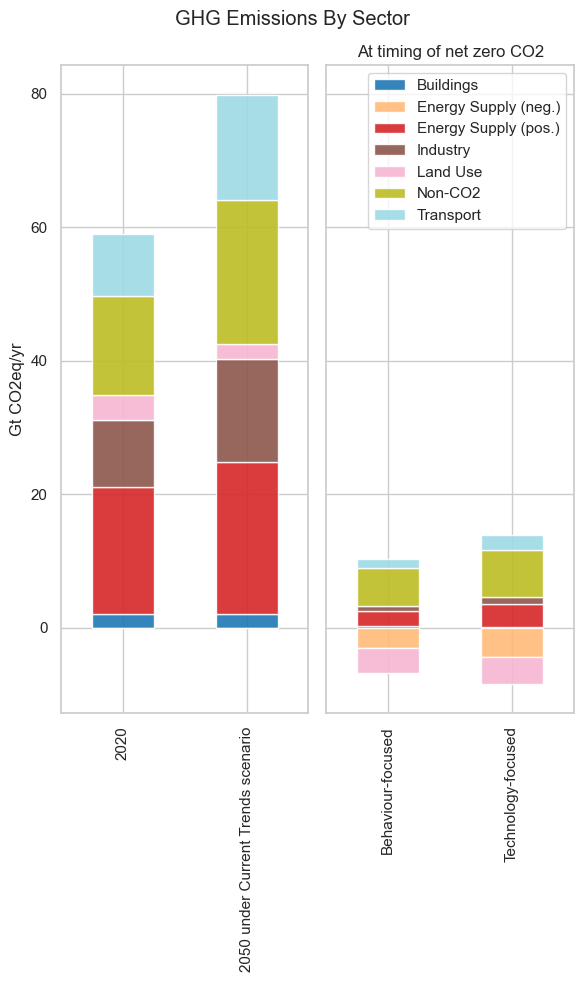

In [16]:
import matplotlib.colors
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['orange', 'magenta', 'brown', 'black', 'blue', 'grey'])

# Set the number of columns for subplots
num_cols = 2
# Calculate the number of rows needed
num_rows = 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(6, 10), sharey=True) # , gridspec_kw={'width_ratios': [1, 3]}

df_emissions_geo_sinks_2020.plot.bar(
   x='year', 
   bars="variable", 
   stacked=True, 
   title="", 
   cmap="tab20", 
   ax=axes[0],
   alpha=0.9
)

pyam_netzero.plot.bar(
   x='scenario', 
   bars="variable", 
   stacked=True, 
   title="At timing of net zero CO2", 
   cmap="tab20",
   ax=axes[1],
   alpha=0.9
)

axes[0].set(xlabel=None)
axes[0].set(xticklabels=[2020, '2050 under Current Trends scenario'])
axes[0].set(ylabel='Gt CO2eq/yr')

axes[0].legend().set_visible(False)

axes[1].set(xlabel=None)
axes[1].set(ylabel=None)
# axes[1].set(yticklabels=[])
axes[1].legend(bbox_to_anchor=(1.4, 0.55))
fig.suptitle('GHG Emissions By Sector')
plt.legend(loc=1)
plt.tight_layout()
# plt.savefig(f"../plots/chapter_12/GHG_shares_per_sector_net_zero.png", bbox_inches="tight")
plt.savefig(f"../../../plots/SOD/chpt_12/report/GHG_shares_per_sector_net_zero.png", bbox_inches="tight")
plt.savefig(f"../../../plots/SOD/chpt_12/report/GHG_shares_per_sector_net_zero.svg", bbox_inches="tight")
# plt.close()
